<div class="clearfix" style="padding: 10px; padding-left: 0px">
<img src="unilogoblack.jpeg" width="250px" style="display: inline-block; margin-top: 5px;">
<a href="http://www.python.org"><img src="Python-logo-notext.svg" width="70px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>


# Basic Scientific Python

J. D. Nichols 2015

## Section 11: Signal processing and numerical analysis

The scientific method requires (to the consternation of many theorists) that hypotheses are compared with data.  In their raw form, data are typically not that useful, and some form of processing and analysis is required.  Whether we realise it or not, this often makes use of the Fourier Transforms that you meet in the Maths course.  Fourier Transforms have been, well, transformative in the development of science and technology (and music!), mainly since the '60s, when J.W Cooley and J. W. Tukey published a method by which Fourier Transforms could be computed about a million times faster than using previous methods. This method is rather obviously called the *Fast Fourier Transform* or *FFT* (although the method behind this was actually written about by Gauss in 1805).  In this section we discuss uses of the FFT including frequency analysis and convolution.

## Fourier Transforms

### Integral form

In Section 8 you plotted an approximation to a square wave using the sum over a series of sinusoids, called a Fourier Series, and found that the more terms that are taken in the sum, the closer the series approximates the true function.  The implication is that any function can then be represented by its Fourier Transform, i.e. the sum, in this case becoming an integral, over a continuous, infinite series of harmonics.  The Maths course tells you that the Fourier Transform (FT), and the Inverse Fourier Transform (IFT) are given by

$$G(f)=\int_{-\infty}^{\infty}g(t)e^{2\pi ift}dt\;\;,$$

$$g(t)=\int_{-\infty}^{\infty}G(f)e^{-2\pi ift}df\;\;,$$

respectively, where $g(t)$ describes the variation of our parameter in the *time domain* and $G(f)$ describes the variation in the *frequency domain*.  These are the basis on which Fourier Analysis proceeds.

#### Discretised form

##### Data sampling and the Nyquist frequency

Although many data are obtained in analogue form (for example, given by some induced voltage around a loop, etc.) these days most data are converted to a digital form, i.e. they are *sampled* at a certain rate (or alternatively, with time interval $\Delta$) and turned into a series of $N$ numbers, which can be stored in a data file (and conveniently read into RAM using one of Numpy's various functions if it's done sensibly!). However, care must be exercised when sampling data to ensure that spurious artefacts are not introduced.   

#### Task 11.1
* In the cell below (this is a short task so is appropriate to execute in this Notebook, although you may, of course, write it in a file and execute it in the IPython interpreter if that is your preference).  Create an array with 800 points over the range $0\le x \le 8\pi$ and plot $y=\cos(x)$.  
* Now, using Numpy indexing, take samples at intervals of 800/8 (i.e. every 100 points), 800/40, and  800/7, and plot these points as different coloured 'x'es joined by similarly coloured dashed lines.  
* What do you notice about the form of the data sampled at different rates compared to the period of continuous function?  Write down your findings in the cell below.

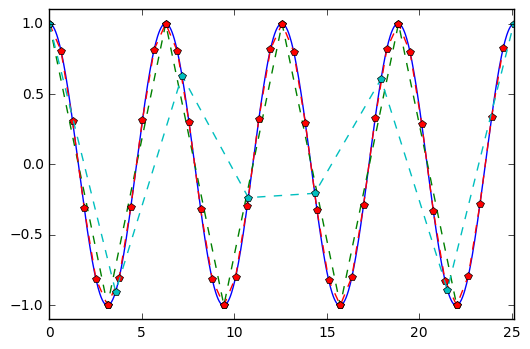

In [134]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,8*np.pi, 800)
y = (np.cos(x[0]), np.cos(x[1]), np.cos(x[2]), np.cos(x[3]))

ax = plt.subplot(111)
ax.plot(x, np.cos(x))
plt.xlim(0, 8*np.pi)
plt.ylim(-1.1, 1.1)

ax.plot(x[0:800:800/8], np.cos(x[0:800:100]), "p--")
ax.plot(x[0:800:800/40], np.cos(x[0:800:800/40]), "p--")
ax.plot(x[0:800:800/7], np.cos(x[0:800:800/7]), "p--")

# that they have the same period, the more steps the closer it looks
# some number of steps fits better than others even if there are roughly the same number of steps

Double-click to edit me.

If the sampling of a continuous periodic function occurs at a certain rate, there is a limit to the frequency that the periodic function can take, while allowing the sampled data to still encode information about the periodicity.  This critical frequency, called the *Nyquist frequency* after the American electronic engineer Harry Nyquist, is exactly half the frequency of the sampling rate:  

$$f_{Ny}=\frac{1}{2\Delta}\;\;,$$

If the data were sampled at a frequency less than twice the Nyquist frequency, spurious lower frequency oscillations are observed, in a phenomenon known as *aliasing*.  This limits the width of the frequency range over which discrete data can be analysed to within $\pm f_{Ny}$.

#### Discrete Fourier Transform

The Fourier Intergrals given above apply to continuous functions $f(t)$ and $F\nu$.  The good news is that, for sampled data with values of

$$g_k = g(t_j),\;\; t_j=j\Delta, \;\; j=0,1,2...,N-1\;\;,$$

the integrals can be approximated by discrete sums.  In this case, the Fourier Transform is estimated at discrete frequency intervals 

$$f_n = \frac{n}{N\Delta}, \;\;\;n=-\frac{N}{2},...,\frac{N}{2}\;\;,$$

and is given by

$$G(f_n)=\Delta\sum_{j=0}^{N-1}g_je^{2\pi ijn/N}\;\;,$$

and the discrete inverse Fourier Transform is

$$g(t_j)=\frac{1}{N}\sum_{n=0}^{N-1}G_ne^{-2\pi ijn/N}\;\;.$$

This, then, is what the FFT algorithm computes, although the details of exactly what makes it so fast are beyond the scope of this course.  A Python implementation of the FFT resides within the Scipy module `fftpack`.  Let's take a look at FFT in action:

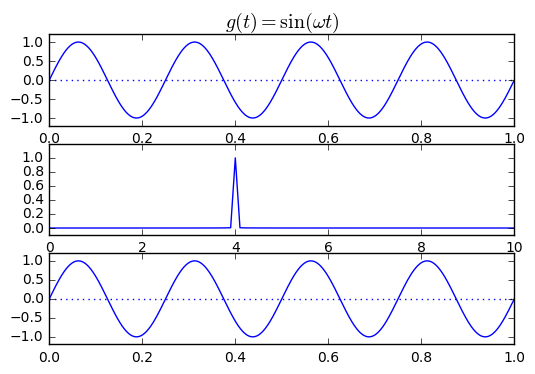

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

# Create a time array of 10,000 samples over 10 s
ns = 10000
t0 = 0.
t1 = 10.
dels = (t1 - t0) / ns
t = np.linspace(t0, t1, ns)

# Create the signal. We set the frequency of the sinusoid to be 4Hz
fsig = 4.
signal = np.sin(2.*np.pi*fsig*t)

# Compute the FFT of the sinusoid signal
G = fft(signal)

# Recover the original signal from the FFT using ifft
rcvsig = ifft(G).real

# Create the frequency domain implied by the above number of samples and sampling rate
# This would be easy to create using linspace, but the helper function fftfreq 
# simplifies this (the output of the FFT is not in ascending order in frequency)
f = fftfreq(ns,dels)

# Sort this in ascending order for plotting.  We could just take the positive frequencies as
# the input wave is real (so the negative frequencies are simply mirror images of the positive)
# but this way is more general
sortinx = np.argsort(f)
f = f[sortinx]
G = G[sortinx]

# Create a new Figure
fig = plt.figure()

# Plot the signal
ax = plt.subplot(311)
ax.plot(t,signal)
ax.axhline(0,ls=':')
plt.ylim([-1.2,1.2])
plt.xlim([0,1])
ax.set_title(r'$g(t)=\sin(\omega t)$', size='x-large')

# Plot the normalised magnitude of the FFT (abs gives the magnitude of a complex number)
# The FFT is normalised by the number of samples taken and
# the factor of 2 ensures the peak is the same height as the amplitude of the wave (see below)
ax = plt.subplot(312)
ax.plot(f,np.abs(G)/(ns/2.))
plt.xlim([0,10])
plt.ylim([-0.1,1.2])

# Plot the recovered signal
ax = plt.subplot(313)
ax.plot(t,rcvsig)
ax.axhline(0,ls=':')
plt.ylim([-1.2,1.2])
plt.xlim([0,1])

plt.draw()
plt.show()

So, what's going on here?  The signal shown in the top panel is a sinusoid of period 4 Hz, which runs for 10 s, although we are only showing the first second of it - note there are 4 full wavelengths over the range of the plot.  We chose 10,000 samples over 10 s, such that there is enough data for the FFT to give us a reasonably close approximation to the 'true' result.  We then compute the FFT of the signal array.  The frequency domain of the FFT corresponds to that given above, although the first half of the array is the positive frequencies, and the second half is the reverse of the negative frequencies.  There is a helper function (called `fftshift`) to shift these such that the zero-frequency component is in the centre, but the `argsort` function is more universally useful, so is demonstrated here.  It gives the indices in the order required to arrange the array in ascending order, and so indexing the array with the result of `argsort` sorts the array. We then plot the normalised magnitude of the FFT.  Note here that the Numpy function `abs` returns the root-sum-square of the real and dimaginary components of a complex number. The FFT is normalised by the number of samples taken. 

So, is this result what we expect?  Well, in this case the analytic result for the Fourier Transform of a unit amplitude sinusoid is:

$$G(f)=\frac{1}{2}\delta(f-f_0)+\frac{1}{2}\delta(f+f_0)\;\;,$$

which is equal to 1/2 when $f=\pm f_0$ and 0 otherwise.  In our case, we have a sharp peak of small but finite width, and whose width becomes smaller as more samples are taken and the discrete case more closely resembles the continuous case.  We have also recovered our signal from the FFT array using `ifft`, taking only the real part of the result.

Let's look at a couple of other properties of the FFT.  Note that above we plotted the magnitude of the FFT.  What does the imaginary part tell us?  Well, a simple way of thinking about the Fourier Transform is that the real part tells us how much of a cosine function is present, the imaginary part tells us how much of a sine function is present, and the arctan of the ratio tells us the phase of the sinusoid (relative to the cosine component) at each frequency.  Let's demonstrate this:

Using matplotlib backend: TkAgg


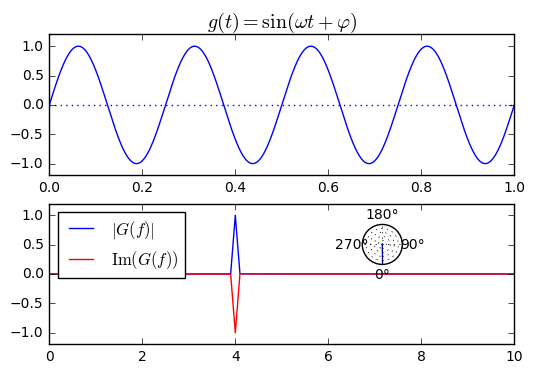

In [479]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
import matplotlib.animation as animation
%matplotlib
# This first bit is as above...

ns = 10000
t0 = 0.
t1 = 10.
dels = (t1 - t0) / ns
t = np.linspace(t0, t1, ns)

f = fftfreq(ns,dels)
sortinx = np.argsort(f)
f = f[sortinx]

# Create the signal. We're creating a 2D array of shape (nphi, ns) 
# where ns is the number of samples
# and nphi (=200) is the length of an array of phase offsets 
# (for a demonstration of the effect of changing phase).
# Each row of the array is a sinusoid, and each row is slightly offset 
# in phase from the one above (starting from 0)
# We set the frequency of the sinusoid to be 4Hz
fsig = 4.
nphi = 200.
phi =  np.linspace(0,2.*np.pi, nphi)
# Note the use of broadcasting in the next line!
signal = np.sin(2.*np.pi*fsig*t + phi[:,np.newaxis])

# For each phase offset, compute the FFT of the sinusoid signal. 
# The keyword axis=1 tells the function to compute the FFT over 
# the 2nd (index 1) dimension of the array
G = fft(signal, axis=1)

# Arrange the rows in ascending order of frequency using sortinx defined above
G = G[:,sortinx]
# Find the index of the maximum of the magnitude of the FFT
pkinx = np.argmax(np.abs(G[0,:]))
# Find the value of 90 - arctan(|G|/Im(G)), which should equal 
# the phase offset of our signal...
ftphi = np.pi/2. - np.arctan2(G[:,pkinx].imag,G[:,pkinx].real)


# Create new Figure
fig = plt.figure()

# Plot the signal
ax = plt.subplot(211)
lines, = ax.plot(t,signal[0,:])
ax.axhline(0,ls=':')
plt.ylim([-1.2,1.2])
plt.xlim([0,1])
ax.set_title(r'$g(t)=\sin(\omega t + \varphi)$', size='x-large')


# Plot the normalised magnitude of the FFT in black and the imaginary part in red
ax = plt.subplot(212)
linegr, = ax.plot(f,np.abs(G[0,:])/(ns/2.), label = r'$|G(f)|$')
linegi, = ax.plot(f,G[0,:].imag/ns, 'r', label=r'$\mathrm{Im}(G(f))$')
plt.xlim([0,10])
plt.ylim([-1.2,1.2])
ax.legend(loc='upper left')

# Add an inset axis to the Figure with a polar plot
ax = plt.axes([.63, .325, .1, .1], polar=True)
# Plot a line indicating the phase angle derived from the FFT
linep, = ax.plot([ftphi[0],ftphi[0]],[0,1])
# Set various parameters re. tick locations, labels, orientation
plt.setp(ax.get_yticklabels(), visible=False)
thetaticks = np.arange(0,360,90)
ax.set_thetagrids(thetaticks, frac=1.5)
ax.set_theta_zero_location('S')

# Define a function that updates the lines shown on the plot
def animate(i):
    """docstring for animate"""
    lines.set_ydata(signal[i,:])
    linegi.set_ydata(G[i,:].imag/(ns/2.))
    linep.set_xdata([ftphi[i],ftphi[i]])

# Run through each value of the phase offset
anim = animation.FuncAnimation(fig, animate, np.arange(200), interval=5)
plt.show()



Here we are building on the previous code by creating a 2D array of signals - each row corresponding to different a phase offset over the range $0\le\varphi\le2\pi$ range.  We then compute the FFT for each row of the signal array - note that we can specify this using a keyword parameter.  We then find the index of the peak of the magnitude of the FFT using the function `argmax` - we only need to do this once, as the frequency of the sinusoid is constant.  We use this index to calculate the phase of our sine function in each case, which should equal the array of phases given in the `phi` array.  We then create an animation, which runs through these phases, plotting the input sinusoid, real and imaginary parts, and computed phase in each case.  Note the use of `plt.axes` to create an inset axis of height and width 0.1, with the lower left hand corner located (x,y) = (0.63, 0.325), where all numbers are fractions of the figure width.  This is a polar plot, with a line of radius 1, and angle $\theta$ equal to the phase of the sinusoid (oriented with respect to the bottom of the plot - the south `'S'` direction).

Finally, let's take a closer look at the form of the peak.  Above, we have plotted the amplitude of the FFT, which gives the amplitude of the wave at each frequency.  Physically, we are often interested in the power of a wave, which is given by the square of the amplitude.  Power is also often quoted in decibels (dB), which is a logarithmic unit that gives the ratio of the power relative to a reference value, e.g. 1 W. The definition of dBs is 

$$P = 10\log_{10}\left(\frac{P}{P_0}\right)\;\;,$$

such that in terms of the amplitude of the FFT (using the law of logs) we have

$$P = 20\log_{10}\left(\frac{G(f)}{G_0}\right)\;\;.$$

Plotting this, then, we have:

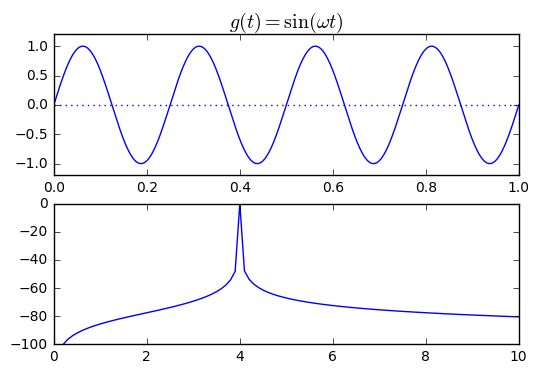

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

ns = 10000
t0 = 0.
t1 = 10.

dels = (t1 - t0) / ns
t = np.linspace(t0, t1, ns)

f = fftfreq(ns,dels)
sortinx = np.argsort(f)
f = f[sortinx]

fsig = 4.
signal = np.sin(2.*np.pi*fsig*t)
G = fft(signal)
G = G[sortinx]

fig = plt.figure()
ax = plt.subplot(211)
ax.plot(t,signal)
ax.axhline(0,ls=':')
plt.ylim([-1.2,1.2])
plt.xlim([0,1])
ax.set_title(r'$g(t)=\sin(\omega t)$', size='x-large')

ax = plt.subplot(212)
ax.plot(f,20.*np.log10(np.abs(G)/(ns/2.)))
plt.xlim([0,10])
plt.ylim([-100,0])

plt.draw()
plt.show()

What are those flares on the side of our peak?  Where do they come from?  Are they to do with the discrete FFT?  Well, partly.  We will look into what causes this flaring later, but briefly, it arises because $\sin(t)$ formally extends to $t=\pm\infty$, whereas we have only taken 10 s of it.  Our signal has an abrupt start and end, which introduces spurious frequencies into the Fourier Transform.  We can reduce this flaring, at the cost of slightly increasing the overall width of the peak, by gently easing the amplitude of our signal up from zero at the start and back down to zero at the end.  This is called "windowing", and many words have been spent on how best to do it.  The details are beyond the scope of this course, but we demonstrate its effect here using a 'Hann' window:

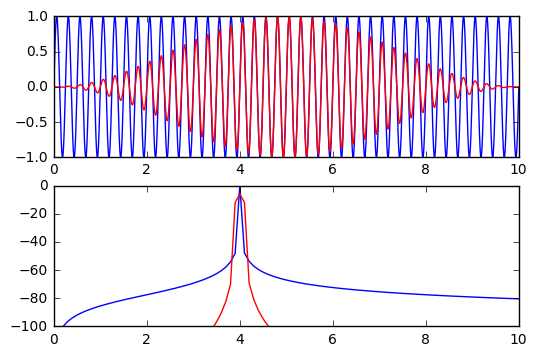

In [408]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import hann

ns = 10000
t0 = 0.
t1 = 10.

dels = (t1 - t0)/ns
t = np.linspace(t0, t1, ns)

f = fftfreq(ns,dels)
sortinx = np.argsort(f)
f = f[sortinx]


fsig = 4.
signal = np.sin(2.*np.pi*fsig*t)
w = hann(ns)
winsig = signal*w

Gs = fft(signal)
Gw = fft(winsig)
Gs = Gs[sortinx]
Gw = Gw[sortinx]

specs = 20*np.log10(np.abs(Gs)/(ns/2.))
specw = 20*np.log10(np.abs(Gw)/(ns/2.))

ax = plt.subplot(211)
ax.plot(t,signal)
ax.plot(t,winsig, 'r')

ax = plt.subplot(212)
ax.plot(f,specs)
ax.plot(f,specw, 'r')
# plt.ylim([-1.3,1.3])
plt.xlim([0,10])
plt.ylim([-100,0])


plt.draw()
plt.show()



We have multiplied each element of signal by a factor that varies between 0 at the edges and 1 in the middle (given by the array `hann`, of the same length as the signal).   You can see the effect in the input signal by the difference between the black and red traces in the top plot (here we show the full 10 s of the signal).  The FFTs are shown in the bottom panel, and it is evident that the wide flaring effect has been reduced by several orders of magnitude, at the cost of slightly widening the peak.  This is useful if we are interested in cutting down the noise in the FFT.

#### Task 11.2

<img src="coupled_eigen.png" width="70%" style="display: inline-block; margin-top: 5px;">

Revive the coupled oscillator ODE code from Section 10.  Set the spring constants to be $k_1=5$, $k_2=1$, $k_3=5$, the mass $m=1$, and the initial displacements $x_{10}=0.5$ and $x_{20}=0.5$. Solve the equations as before, and this time compute and plot the FFT of the result.  Is the result consistent with what you expect, based on your previous work in this course?  What happens if you set the initial displacements to be $x_{10}=0.5$ and $x_{20}=-0.5$?  What happens if you use other parameter values?

In [481]:
# it is consistent
# if x20 = -0.5 then the ft peak is smaller, this is expected as the signal starts at 0,
# and so there is not as much discrepancy between the signal and the rest (x=0)
# if abs(x10) =! abs(x20) then then two peaks appear in the ft
##################################################################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq
import scipy.io.wavfile as wavfile


wav = np.load("fft.npy")
recvsig = ifft(wav).real
t = np.linspace(0.,11.,489584)
f = np.linspace(0.,44.1e3, 489584)
a =fftfreq(110, 0.1)
np.reshape(t, (8,-1))


array([[  0.00000000e+00,   2.24681004e-05,   4.49362008e-05, ...,
          1.37493540e+00,   1.37495787e+00,   1.37498034e+00],
       [  1.37500281e+00,   1.37502528e+00,   1.37504774e+00, ...,
          2.74993821e+00,   2.74996068e+00,   2.74998315e+00],
       [  2.75000562e+00,   2.75002809e+00,   2.75005055e+00, ...,
          4.12494102e+00,   4.12496349e+00,   4.12498596e+00],
       ..., 
       [  6.87501404e+00,   6.87503651e+00,   6.87505898e+00, ...,
          8.24994945e+00,   8.24997191e+00,   8.24999438e+00],
       [  8.25001685e+00,   8.25003932e+00,   8.25006179e+00, ...,
          9.62495226e+00,   9.62497472e+00,   9.62499719e+00],
       [  9.62501966e+00,   9.62504213e+00,   9.62506460e+00, ...,
          1.09999551e+01,   1.09999775e+01,   1.10000000e+01]])

#### Task 11.3
'Dynamic spectra' are a way of visualising how frequencies in a signal vary over time.  Instead of taking an FFT of the entire time series, it is broken up into time-chunks and the FFTs of all the individual chunks are stacked together to create a 2D array, usually with frequency in the vertical dimension and time along the horizontal.  The array is then shown as an image, with colours denoting different power values. This shows how the power in the signal changes in frequency over time.  You can see a great example [here](https://www.youtube.com/watch?v=llXu9pSvF54) made from data obtained by the Galileo spacecraft as it orbited Jupiter in 1996. As Galileo passed through Ganymede's mini-magnetosphere, the plasma wave instrument picked up signals which have been both plotted using a dynamic spectrum and converted to sound, such that you can see and hear how the changes in the spectrum correspond to variation in frequency.  The waves are caused by oscillations on the moon's magnetic field lines, and the change in frequency is related to the strength of the magnetic field.  

* We're going to create our own dynamic spectrum.  First, using the method you saw in Section 8 for downloading a file from the Web, read in and open the Numpy save file that is located at the following web address: http://www.ion.le.ac.uk/~jdn/fft.npy.  Note the way to load a Numpy file is `np.load(<file>)`. This is an FFT of a short ~11s clip of a tune that was sampled at 44.1 kHz.  

* Recover the original signal from the FFT, and plot both the normalised spectrum and the recovered time series.  What do the peaks in the spectrum a few hundred Hz either side of ~500 Hz represent?  Note also the flaring that we saw above.

(This can be converted into a .wav file using `wavfile.write`:
```python
import scipy.io.wavfile as wavfile
wavfile.write('file.wav', sample_rate, signal.astype('int16'))
```
Bonus kudos if you can identify the piece (using headphones!).)

* Create a dynamic spectrum, i.e. a 2D array with frequency in the vertical dimension and time along the horizontal. Luckily, the `fft` function accepts a 2D array as input, and you can specify the axis over which it should compute the FFTs.  So first, you'll need to 'fold' or reshape the recovered time series into a 2D array using an appropriate Numpy function.  To do this, you'll need to trim it to contain the same number of elements as in the resulting 2D array.  You can work out the dimensions of the 2D array by considering the sampling rate, the total length of the time series and the desired time resultion of the dynamic spectrum.  Set this to be 10 Hz.  
* Once you've trimmed the array it can be reshaped using a Numpy command and transposed such that each time series chunk runs vertically, and they are 'stacked' horizontally.  This array can then be used as an input to `fft`, though you will get a cleaner spectrum if you first multiply each column by a Hanning window of the same length as the vertical dimension of the reshaped time series array. 
* Once you've taken the FFT, trim it to consider frequencies between 0 and 1000 Hz, and then show the 2D array of powers as an image using `imshow`.  Make sure the axes are labelled appropriately using the `extent` keyword.  

That's your dynamic spectrum!  You will hopefully be able to identify the individual notes and recognise the tune if you managed to listen to it.

#### Task 11.4
Read the Cassini magnetometer data in the file 'rev26_27.dat' into a RecArray, as you did in Section 8. This time, create a new array that is a copy of the radial component of the field, interpolate linearly over any data gaps (denoted by the value 'nan'), and plot the original and interpolated array in a new Figure (use different colours for the original and interpolated data).  Take the FFT of the interpolated data and plot a 'periodogram', i.e. FFT amplitude versus oscillation period (not frequency).  Plot the x axis in hours, and limit it to less than 20 h. Saturn's magnetic field is like a rotationally symmetric bar magnet that is as aligned, as far as we've been able to measure, with the spin axis; what, then, is interesting about your results?

/cm/shared/apps/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide


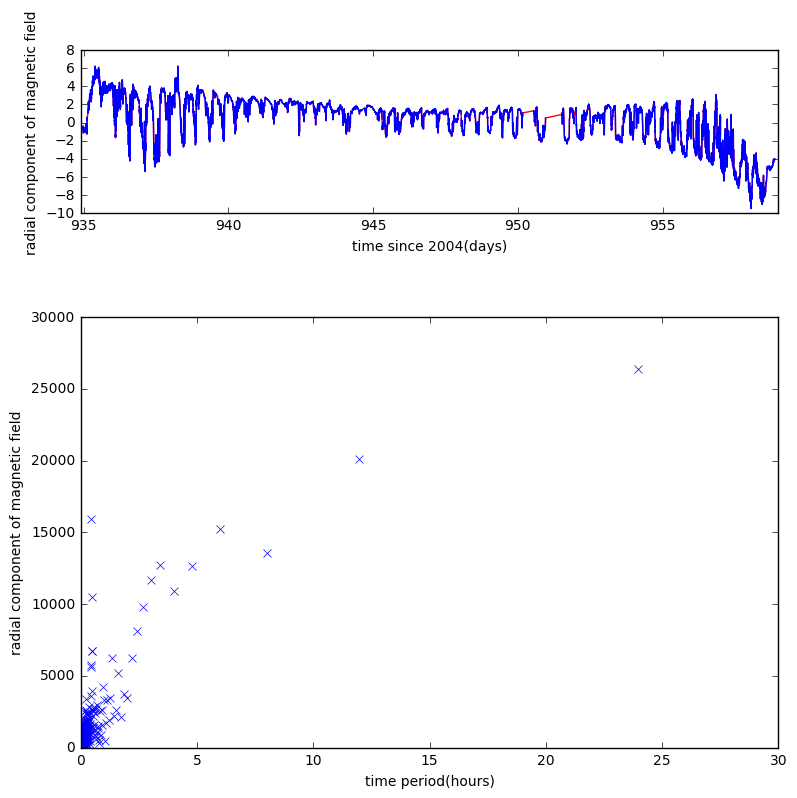

In [436]:
from scipy import interpolate
import matplotlib.gridspec as gridspec
data = "rev26_27.dat"
recdat = np.recfromtxt(data, names = ["time", "r", "theta", "phi"])
r = recdat.r
t = recdat.time

not_nan = np.logical_not(np.isnan(r))
i = np.arange(len(r))
rinterp = np.interp(i, i[not_nan], r[not_nan])

period = 1/fftfreq(34504, (t[-1]-t[0])/34504)
fftamp = fft(rinterp)

sort = np.argsort(fftamp)
fftamp = fftamp[sort]
period = period[sort]

gs = gridspec.GridSpec(8, 1)

plt.figure(figsize=[9,9])

ax1 = plt.subplot(gs[:2, :])
ax1.plot(t, rinterp, "r")
ax1.plot(t, r, "b")
ax1.set_xlim([934.9, 959])
ax1.set_xlabel("time since 2004(days)")
ax1.set_ylabel("radial component of magnetic field")

ax2 = plt.subplot(gs[3:, :])
ax2.plot(period, abs(fftamp), "x")
ax2.set_xlim(0)
ax2.set_ylabel("radial component of magnetic field")
ax2.set_xlabel("time period(hours)")
# I notice that there is a couple of high amplitude radial components, with long oscilation periods, and many small
# amplitude short oscilation period components
# there appears to be 2 different linear dependances, ie at different gradients, both from the main cluster 

In [337]:
print t

[ 934.909028  934.909722  934.910417 ...,  958.868056  958.86875
  958.869444]


### Power leakage

Let's look again at 'windowing'.  We saw above that our supposed $\delta$-function FFT of a sine wave was actually flared out at the bottom - a phenomenon called *power leakage*.  We mentioned that this was due to the abrupt start and stop of our data, and discussed the concept of 'windowing' the data to reduce the effect.  We now have the tools to understand why this occurs.  When we take our limited sample of data, we are doing none other than multiplying an infinite set of data by a function that is equal to zero at all times apart from during our sample interval, where it is equal to 1, i.e. a boxcar function the width of the data sample.  By the convolution theorem, the FFT of the product of the sampled data and the boxcar function is equal to the FFT of the sampled data convolved with the FFT of the boxcar function.  So this abrupt windowing of our data is actually modifiying our FFT, producing the power leakage we saw. Have a look at the following:


/cm/shared/apps/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in log10


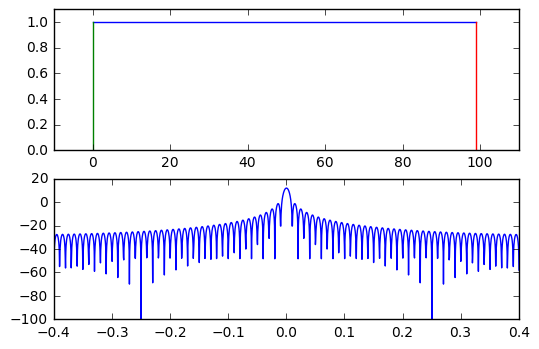

In [450]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import boxcar

f = plt.figure()

ns = 100.
w = boxcar(ns)

ft = fft(w)

ax = plt.subplot(211)
ax.plot(w)
ax.plot([0,0],[0,1])
ax.plot([99,99],[0,1])

plt.ylim([0,1.1])
plt.xlim([-10,110])

ax = plt.subplot(212)

A = fft(w, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
ax.plot(freq, response)
plt.xlim([-0.4,0.4])


plt.draw()
plt.show()

#### Task 11.6
Modify the above code to overplot the result using a Hann window function.  What do you notice about the result, compared with the that for the boxcar?  How does this explain the effect on the width of our supposed $\delta$-function above?

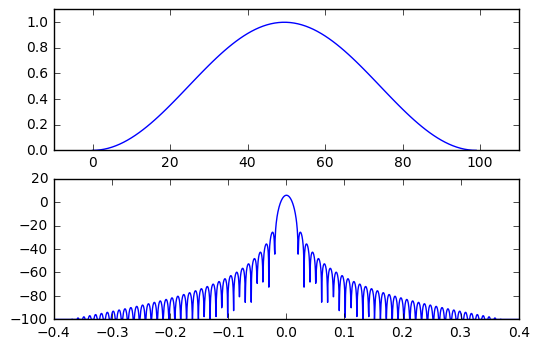

In [480]:
#f = plt.figure()

#ns = 100.
#w = boxcar(ns)

#ft = fft(w)

#ax = plt.subplot(211)
#ax.plot(w)
#ax.plot([0,0],[0,1])
#ax.plot([99,99],[0,1])

#plt.ylim([0,1.1])
#plt.xlim([-10,110])

#ax = plt.subplot(212)

#A = fft(w, 2048) / 25.5
#mag = np.abs(fftshift(A))
#freq = np.linspace(-0.5, 0.5, len(A))
#response = 20 * np.log10(mag)
#response = np.clip(response, -100, 100)
#ax.plot(freq, response)
#plt.xlim([-0.4,0.4])

#plt.draw()
#plt.show()
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import boxcar

f = plt.figure()

ns = 100.
w = hann(ns)

ft = fft(w)

ax = plt.subplot(211)
ax.plot(w)

plt.ylim([0,1.1])
plt.xlim([-10,110])

ax = plt.subplot(212)

A = fft(w, 2048) / 25.5
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
ax.plot(freq, response)
plt.xlim([-0.4,0.4])


plt.draw()
plt.show()
# It makes the result the shape of a gaussian, not boxcar

### Lomb-Scargle Analysis

FFTs are extremely useful, as we have seen, but one drawback is that they require the data to be evenly-sampled, i.e. the data points occur at a constant rate, with no data gaps.  Note that when we took the FFT of the Cassini magnetometer data above, we had to interpolate over the data gaps, thereby introducing 'fake' (and not necessarily accurate) data in order to make the process work.  It is often the case that data are not evenly-sampled - what do we do then?  We have a choice - we either interpolate onto a regular grid, at the cost of some time resolution, and take the FFT, or we employ *Lomb-Scargle*  analysis.  This process is essentially identical to estimating the amount of power at a given frequency by least-squares fitting to the equation

$$g(t)=A\sin(2\pi ft) + B\cos(2\pi ft)\;\;,$$

and does not require the data to be evenly sampled.  Execute the following code:

/cm/shared/apps/python/2.7.12/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


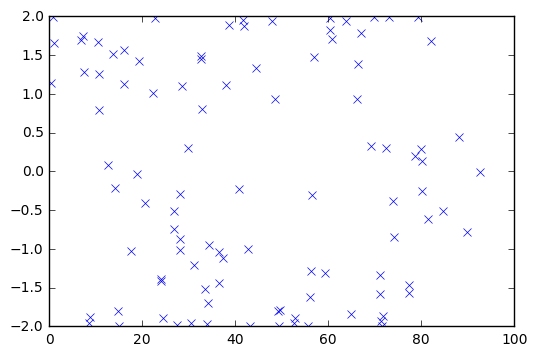

In [477]:
import numpy as np
import matplotlib.pyplot as plt
a = 2.
w = 2.
nin = 100.
nf = 100000

t = np.random.rand(nin)*30*np.pi
y = a*np.sin(w*t)

plt.figure()
plt.plot(t, y, 'bx')
plt.draw()
plt.show()

There is no way, from eyeballing these data, that you would guess that they are sinusoidal... but they are! Look at the code - the abscissa ($t$ values) are random, but the $y$ values are not. Interpolating these data wouldn't help here. If we put these data into the Lomb-Scargle algorithm, however...

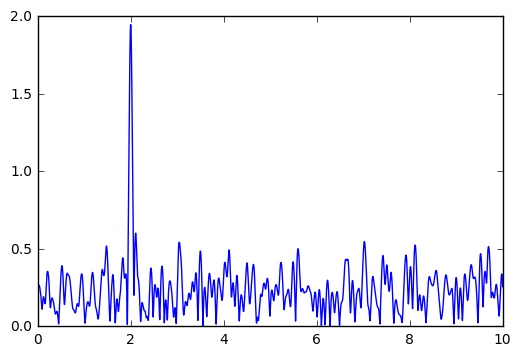

In [466]:
import scipy.signal as signal

f = np.linspace(0.01, 10, nf)
pgram = signal.lombscargle(t, y, f)
npgram = np.sqrt(pgram*4./nin)
plt.figure()
plt.plot(f,npgram)
plt.draw()
plt.show()


Lo and behold, our 2Hz signal is revealed!  We have produced a frequency array to test (note that this does require that any frequencies of interest are included in the array), and then plotted the result versus these frequencies. The value of the unnormalised periodogram is `a**2*nin/4`, such that to recover the amplitude of the oscillation, we normalise the periodogram on line 5 using `np.sqrt(pgram*4./nin)`.

Lomb-Scargle periodograms are useful - but they only really make sense when the period is known to be constant throughout the interval, and they should not be used when the data are clustered, i.e. grouped together with large gaps between the groups. 

#### Task 11.7
Re-do the Cassini analysis above, but with a Lomb-Scargle analysis, rather than FFT.  Just use the second half of the cassini data.  Note that you will still have to remove `nan`s from the array, just not interpolate over them. 

In [475]:
import matplotlib.patches as mpatches
pl.add_patch(mpatches.Ellipse?

In [476]:
np.diff?

<div class="alert alert-danger" style="width: 60%; margin-left: 20%; margin-top:20px">
<p>**Checkpoint: Please have the above marked and signed off by a demonstrator before continuing**</p>
</div>